# <center> Let's learn to play with data and generate some insights using python </center>

In [1]:
# Importing the libraries

import pandas as pd
import numpy as np

# We'll be using the term pd for commands from pandas and np for numpy

In [2]:
# Importing the CSV file in Jupyter Notebook
# Here df is the dataframe and pd is how we refer the use of library PANDAS

df=pd.read_csv('employees.csv')

In [3]:
# Let's see the columns of our data with their datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   First Name         933 non-null    object 
 1   Gender             855 non-null    object 
 2   Start Date         1000 non-null   object 
 3   Last Login Time    1000 non-null   object 
 4   Salary             1000 non-null   int64  
 5   Bonus %            1000 non-null   float64
 6   Senior Management  933 non-null    object 
 7   Team               957 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 62.6+ KB


In [4]:
# We can also see the datatypes using the dtypes function.
df.dtypes

First Name            object
Gender                object
Start Date            object
Last Login Time       object
Salary                 int64
Bonus %              float64
Senior Management     object
Team                  object
dtype: object

In [5]:
# It tells us the shape of the data i.e it contains 1000 rows and 8 columns
df.shape

(1000, 8)

In [6]:
#now if we want to see the first few rows of our data we can use the head function
df.head(8)

# NOTE:df.head is just a method object for the head method of the dataframe df.
# The parentheses are needed to actually call the method.

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,Douglas,Male,8/6/1993,12:42 PM,97308,6.945,True,Marketing
1,Thomas,Male,3/31/1996,6:53 AM,61933,4.170,True,NaN
2,Maria,Female,4/23/1993,11:17 AM,130590,11.858,False,Finance
3,Jerry,Male,3/4/2005,1:00 PM,138705,9.340,True,Finance
4,Larry,Male,1/24/1998,4:47 PM,101004,1.389,True,Client Services
5,Dennis,Male,4/18/1987,1:35 AM,115163,10.125,False,Legal
6,Ruby,Female,8/17/1987,4:20 PM,65476,10.012,True,Product
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance


In [7]:
df.describe()

# The describe() function applies basic statistical computations on the dataset 
# like extreme values, count of data points standard deviation, etc. 
# Any missing value or NaN value is automatically skipped. 
# describe() function gives a good picture of the distribution of data.

,Salary,Bonus %
count,1000.000000,1000.000000
mean,90662.181000,10.207555
std,32923.693342,5.528481
min,35013.000000,1.015000
25%,62613.000000,5.401750
50%,90428.000000,9.838500
75%,118740.250000,14.838000
max,149908.000000,19.944000


In [8]:
# Whatever data we will get will not be in the good form.
# It will definitely contain some null(NaN) values and missing values.

#  <center> Let's learn to handle the missing values of data  </center>

In [9]:
# checking the null values
df.isnull()

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,True
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
995,False,True,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False


In [10]:
# It is very hard to get a count by seeing the true-false scenario. So here is the solution
df.isnull().sum()

# This command will give you the exact number of null values in each column

First Name            67
Gender               145
Start Date             0
Last Login Time        0
Salary                 0
Bonus %                0
Senior Management     67
Team                  43
dtype: int64

In [11]:
# Now for handling these missing values there can be several cases like dropping the rows
# containing NaN or replacing NaN with either mean, median, mode, or some other value.

df["Gender"].fillna("No Gender", inplace = True)     # The inplace = true refers that changes are made entirely and 
df.isnull().sum()                                    # false will mean that the changes are for particular cell only

# We will see that now there will be no null value for the gender column.

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management    67
Team                 43
dtype: int64

In [12]:
# creating NaN series True for NaN values
NaN_FirstName = pd.isnull(df["First Name"])
   
# filtering data
# displaying data only with Gender = NaN
df[NaN_FirstName]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
23,NaN,Male,6/14/2012,4:19 PM,125792,5.042,NaN,NaN
25,NaN,Male,10/8/2012,1:12 AM,37076,18.576,NaN,Client Services
32,NaN,Male,8/21/1998,2:27 PM,122340,6.417,NaN,NaN
39,NaN,Male,1/29/2016,2:33 AM,122173,7.797,NaN,Client Services
...,...,...,...,...,...,...,...,...
902,NaN,Male,5/23/2001,7:52 PM,103877,6.322,NaN,Distribution
925,NaN,Female,8/23/2000,4:19 PM,95866,19.388,NaN,Sales
946,NaN,Female,9/15/1985,1:50 AM,133472,16.941,NaN,Distribution
947,NaN,Male,7/30/2012,3:07 PM,107351,5.329,NaN,Marketing


In [13]:
# Similarly checking for the Senior Management column
NaN_SeniorManagement=pd.isnull(df['Senior Management'])
df[NaN_SeniorManagement]

,First Name,Gender,Start Date,Last Login Time,Salary,Bonus %,Senior Management,Team
7,NaN,Female,7/20/2015,10:43 AM,45906,11.598,NaN,Finance
23,NaN,Male,6/14/2012,4:19 PM,125792,5.042,NaN,NaN
25,NaN,Male,10/8/2012,1:12 AM,37076,18.576,NaN,Client Services
32,NaN,Male,8/21/1998,2:27 PM,122340,6.417,NaN,NaN
39,NaN,Male,1/29/2016,2:33 AM,122173,7.797,NaN,Client Services
...,...,...,...,...,...,...,...,...
902,NaN,Male,5/23/2001,7:52 PM,103877,6.322,NaN,Distribution
925,NaN,Female,8/23/2000,4:19 PM,95866,19.388,NaN,Sales
946,NaN,Female,9/15/1985,1:50 AM,133472,16.941,NaN,Distribution
947,NaN,Male,7/30/2012,3:07 PM,107351,5.329,NaN,Marketing


In [14]:
#now lets replace the null values of 'Senior Management' column with mode of rest data. 

mode = df['Senior Management'].mode().values[0]
df['Senior Management']= df['Senior Management'].replace(np.nan, mode)
df.isnull().sum()

First Name           67
Gender                0
Start Date            0
Last Login Time       0
Salary                0
Bonus %               0
Senior Management     0
Team                 43
dtype: int64

In [15]:
# Now for the first name and team, we cannot fill the missing values with arbitrary data, so,
# let’s drop all the rows containing these missing values.

df = df.dropna(axis = 0, how ='any')

print(df.isnull().sum())
df.shape




First Name           0
Gender               0
Start Date           0
Last Login Time      0
Salary               0
Bonus %              0
Senior Management    0
Team                 0
dtype: int64


(899, 8)

#  <center>Data Visualization </center>

In [16]:
# importing the visualization libraries 
import seaborn as sns
import matplotlib.pyplot as plt

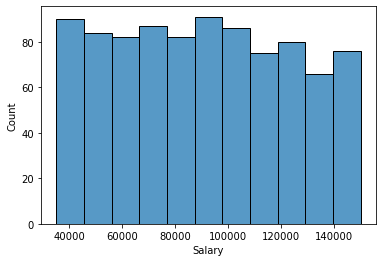

In [17]:
# Histogram - It can be used for both uni and bivariate analysis. 
# (Univariate statistics summarize only one variable at a time. Bivariate statistics compare two variables.
#  Multivariate statistics compare more than two variables.)

sns.histplot(x='Salary', data=df )
plt.show()

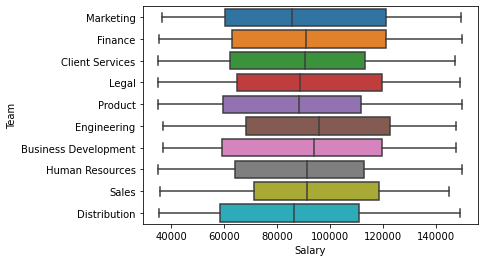

In [18]:
# BoxPlot 
# Can also be used for uni and bivariate analysis
sns.boxplot( x="Salary", y='Team', data=df, )
plt.show()

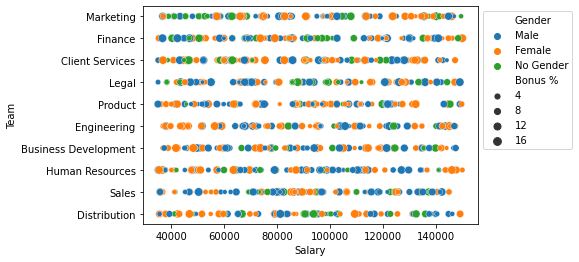

In [19]:
sns.scatterplot( x="Salary", y='Team', data=df,
                hue='Gender', size='Bonus %')
  
# Placing Legend outside the Figure
plt.legend(bbox_to_anchor=(1, 1), loc=2)
  
plt.show()